In [ ]:
# https://www.kaggle.com/datasets/youssefmohmmed/dogs-skin-diseases-image-dataset

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [ ]:
IMAGE_SIZE = 200
BATCH_SIZE = 20
CHANNELS = 3
EPOCHS = 100

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory = '/content/drive/MyDrive/Machine_Learning/PetBuddy_2ndYrDesignLab_imageModel/dog/data/train',
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory = '/content/drive/MyDrive/Machine_Learning/PetBuddy_2ndYrDesignLab_imageModel/dog/data/test',
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)
validation_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory = '/content/drive/MyDrive/Machine_Learning/PetBuddy_2ndYrDesignLab_imageModel/dog/data/valid',
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 3034 files belonging to 6 classes.
Found 433 files belonging to 6 classes.
Found 870 files belonging to 6 classes.


In [ ]:
train_ds.class_names

['Dermatitis',
 'Fungal_infections',
 'Healthy',
 'Hypersensitivity',
 'demodicosis',
 'ringworm']

In [ ]:
len(train_ds), len(validation_ds), len(test_ds)

(152, 44, 22)

In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
validation_ds = validation_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.Rescaling(1/255)
])

In [ ]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.25)
])

In [ ]:
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 6

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((1, 1)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [ ]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_6 (Sequential)       │ (20, 200, 200, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (20, 198, 198, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (20, 99, 99, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (20, 97, 97, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (20, 48, 48, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (20, 46, 46, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (20, 23, 23, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (20, 21, 21, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (20, 21, 21, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (20, 28224)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (20, 64)               │     1,806,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (20, 6)                │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,900,038 (7.25 MB)

 Trainable params: 1,900,038 (7.25 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=validation_ds,
    verbose=1,
    epochs=EPOCHS,
)

Epoch 1/100
152/152 ━━━━━━━━━━━━━━━━━━━━ 41s 175ms/step - accuracy: 0.2470 - loss: 1.7907 - val_accuracy: 0.2713 - val_loss: 1.6364
Epoch 2/100
152/152 ━━━━━━━━━━━━━━━━━━━━ 22s 147ms/step - accuracy: 0.3607 - loss: 1.5127 - val_accuracy: 0.3839 - val_loss: 1.5446
Epoch 3/100
152/152 ━━━━━━━━━━━━━━━━━━━━ 26s 168ms/step - accuracy: 0.3700 - loss: 1.4792 - val_accuracy: 0.3977 - val_loss: 1.4564
Epoch 4/100
152/152 ━━━━━━━━━━━━━━━━━━━━ 21s 140ms/step - accuracy: 0.4023 - loss: 1.3899 - val_accuracy: 0.4034 - val_loss: 1.4102
Epoch 5/100
152/152 ━━━━━━━━━━━━━━━━━━━━ 42s 147ms/step - accuracy: 0.4342 - loss: 1.3214 - val_accuracy: 0.4230 - val_loss: 1.3457
Epoch 6/100
152/152 ━━━━━━━━━━━━━━━━━━━━ 21s 137ms/step - accuracy: 0.4333 - loss: 1.2860 - val_accuracy: 0.4368 - val_loss: 1.3749
Epoch 7/100
152/152 ━━━━━━━━━━━━━━━━━━━━ 22s 144ms/step - accuracy: 0.4539 - loss: 1.2483 - val_accuracy: 0.4299 - val_loss: 1.3854
Epoch 8/100
152/152 ━━━━━━━━━━━━━━━━━━━━ 22s 145ms/step - accuracy: 0.4648 -

In [ ]:
scores = model.evaluate(test_ds)

22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.8333 - loss: 0.6579


In [ ]:
model.save("/content/drive/MyDrive/Machine_Learning/PetBuddy_2ndYrDesignLab_imageModel/dog/dog_model.h5")

In [ ]:
model = tf.keras.models.load_model('/content/drive/MyDrive/Machine_Learning/PetBuddy_2ndYrDesignLab_imageModel/dog/dog_model.h5')
import numpy as np

class_names = ['Dermatitis',
 'Fungal_infections',
 'Healthy',
 'Hypersensitivity',
 'demodicosis',
 'ringworm']

def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

plt.figure(figsize=(16, 16))
for images, labels in test_ds.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")

Output hidden; open in https://colab.research.google.com to view.

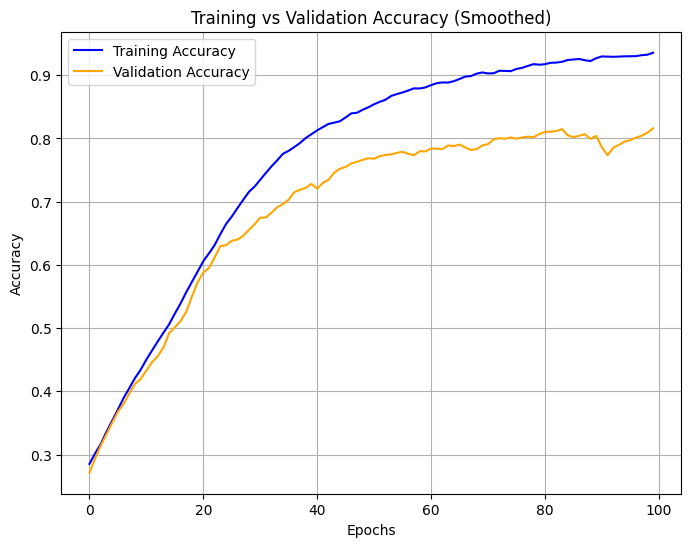

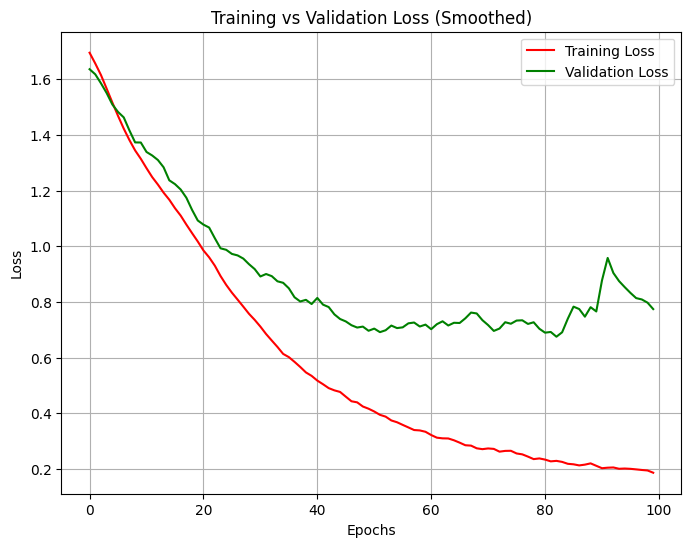

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def smooth_curve(points, factor=0.8):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

# Plot Accuracy
plt.figure(figsize=(8, 6))
plt.plot(smooth_curve(history.history['accuracy']), label='Training Accuracy', color='blue')
plt.plot(smooth_curve(history.history['val_accuracy']), label='Validation Accuracy', color='orange')
plt.title('Training vs Validation Accuracy (Smoothed)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot Loss
plt.figure(figsize=(8, 6))
plt.plot(smooth_curve(history.history['loss']), label='Training Loss', color='red')
plt.plot(smooth_curve(history.history['val_loss']), label='Validation Loss', color='green')
plt.title('Training vs Validation Loss (Smoothed)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()
